In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from tabulate import tabulate
import random
import tensorflow as tf

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

df.drop('isFlaggedFraud', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751827 entries, 0 to 1751826
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 133.7+ MB


In [6]:
df.sample(6)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
175552,12,CASH_OUT,618987.58,C643022274,26449.00,0.00,C1993178637,383451.63,670299.95,0
1519199,153,CASH_OUT,24188.47,C941539459,0.00,0.00,C1184177412,113147.77,137336.24,0
633212,35,CASH_OUT,121500.66,C1515788548,324.00,0.00,C1220829382,0.00,121500.66,0
564377,22,CASH_OUT,183129.95,C245906237,7428.94,0.00,C1971732851,858960.97,1042090.92,0
126707,11,CASH_IN,142094.04,C950675964,7846645.14,7988739.19,C51239061,804639.82,662545.78,0
904402,43,PAYMENT,25709.78,C1503487196,0.00,0.00,M953606956,0.00,0.00,0


In [7]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [8]:
fraud_min_max = [
    ['amount', df.amount.min(), df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['isFraud', df.isFraud.min(), df.isFraud.max()]
]

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True,
        tablefmt='colab',
        numalign='right'
    )
)

    columns           min value    max value
--  --------------  -----------  -----------
 0  amount                 0.06        1e+07
 1  oldbalanceOrg             0  3.89394e+07
 2  newbalanceOrig            0  3.89462e+07
 3  oldbalanceDest            0  4.22074e+07
 4  isFraud                   0            1


In [9]:
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')
    if df[col].dtype == 'int64':
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

# Use category dtype for categorical column
df['type'] = df['type'].astype('category')

In [10]:
# Check duplicate values
df.duplicated().sum()

0

In [11]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8,6)

Universal Data Visulization

In [12]:
df['step'].value_counts()

,count
step,
19,51352
18,49579
139,46054
43,45060
15,44609
...,...
124,4
28,4
76,4


<ipython-input-13-c316b7b7b898>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='type', data=df, palette='PuBu')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-li

Text(0, 0.5, 'Number of transactions')

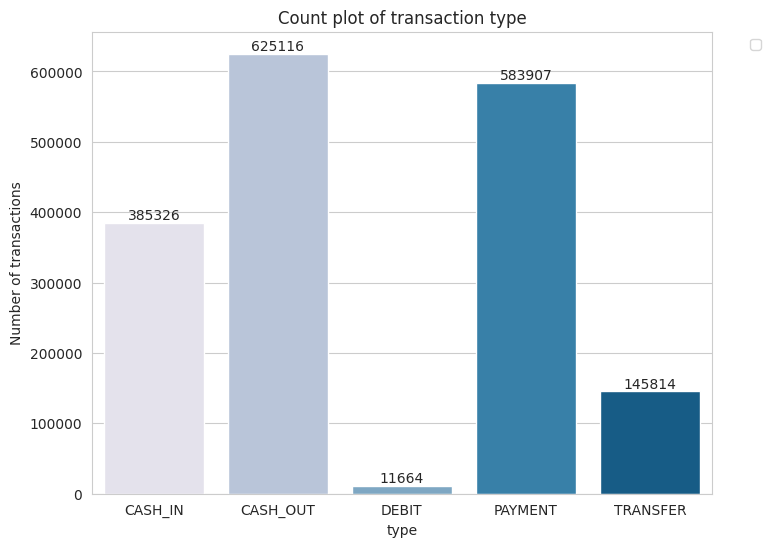

In [13]:
ax = sns.countplot(x='type', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

Text(0.5, 1.0, 'Distribution of transaction amount')

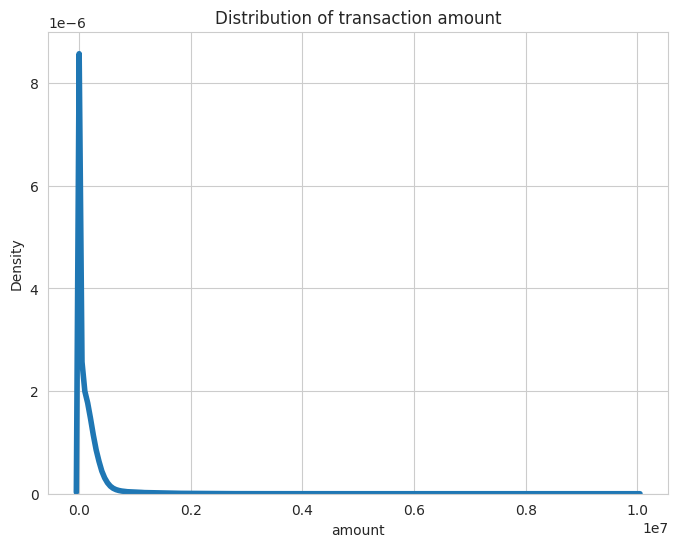

In [14]:
sns.kdeplot(df['amount'], linewidth=4)
plt.title('Distribution of transaction amount')

In [15]:
df['nameOrig'].value_counts()

,count
nameOrig,
C1999539787,3
C1028315484,2
C714762620,2
C1918750088,2
C1990399992,2
...,...
C1489507532,1
C2123503366,1
C184715994,1


Text(0.5, 1.0, 'Distribution of transaction amount')

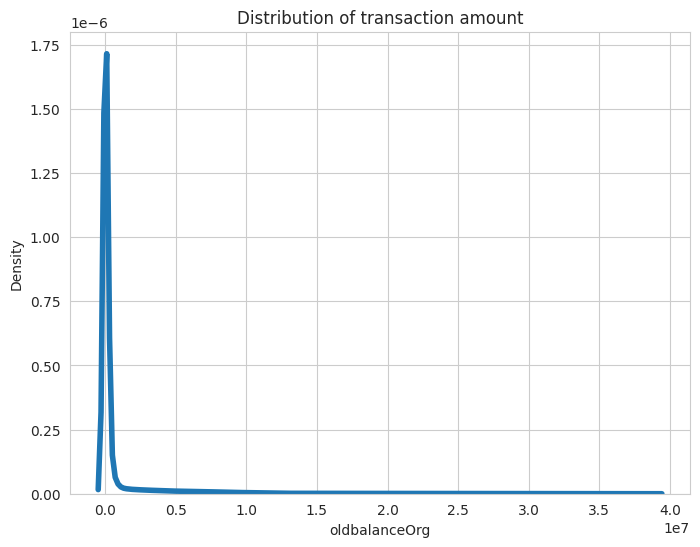

In [16]:
sns.kdeplot(df['oldbalanceOrg'], linewidth=4)
plt.title('Distribution of transaction amount')

Text(0.5, 1.0, 'Distribution of transaction amount')

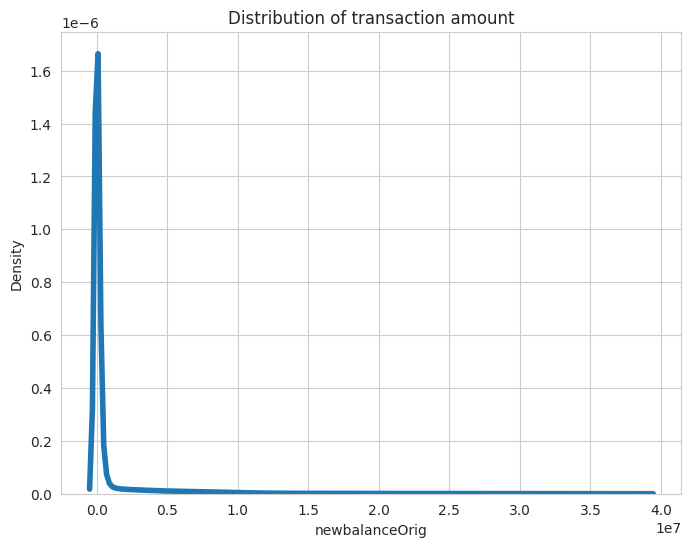

In [17]:
sns.kdeplot(df['newbalanceOrig'], linewidth=4)
plt.title('Distribution of transaction amount')

In [18]:
df['nameDest'].value_counts()

,count
nameDest,
C985934102,99
C1286084959,97
C248609774,94
C665576141,93
C1590550415,91
...,...
M820722831,1
M1777378139,1
M1382934789,1


Text(0.5, 1.0, 'Distribution of transaction amount')

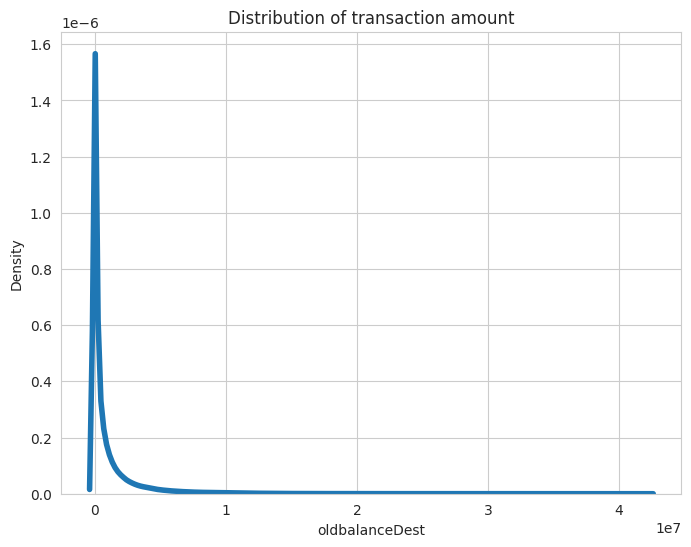

In [19]:
sns.kdeplot(df['oldbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

Text(0.5, 1.0, 'Distribution of transaction amount')

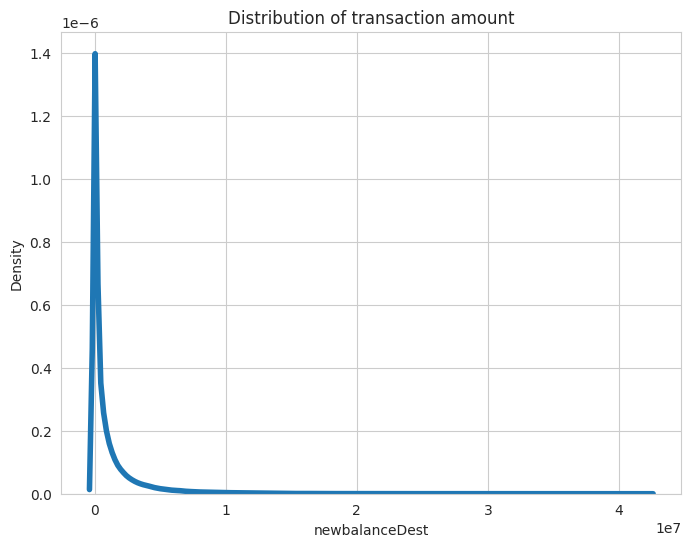

In [20]:
sns.kdeplot(df['newbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

<ipython-input-21-d174391ea540>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='isFraud', data=df, palette='PuBu')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


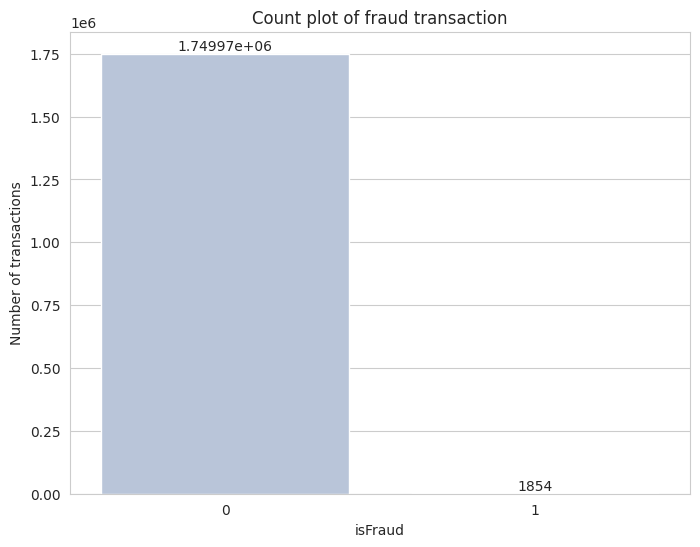

In [21]:
ax = sns.countplot(x='isFraud', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')

del ax

  Bivariate data visualization

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-22-6c0ccffb48ce>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.groupby(['type', 'isFraud']).size().unstack()


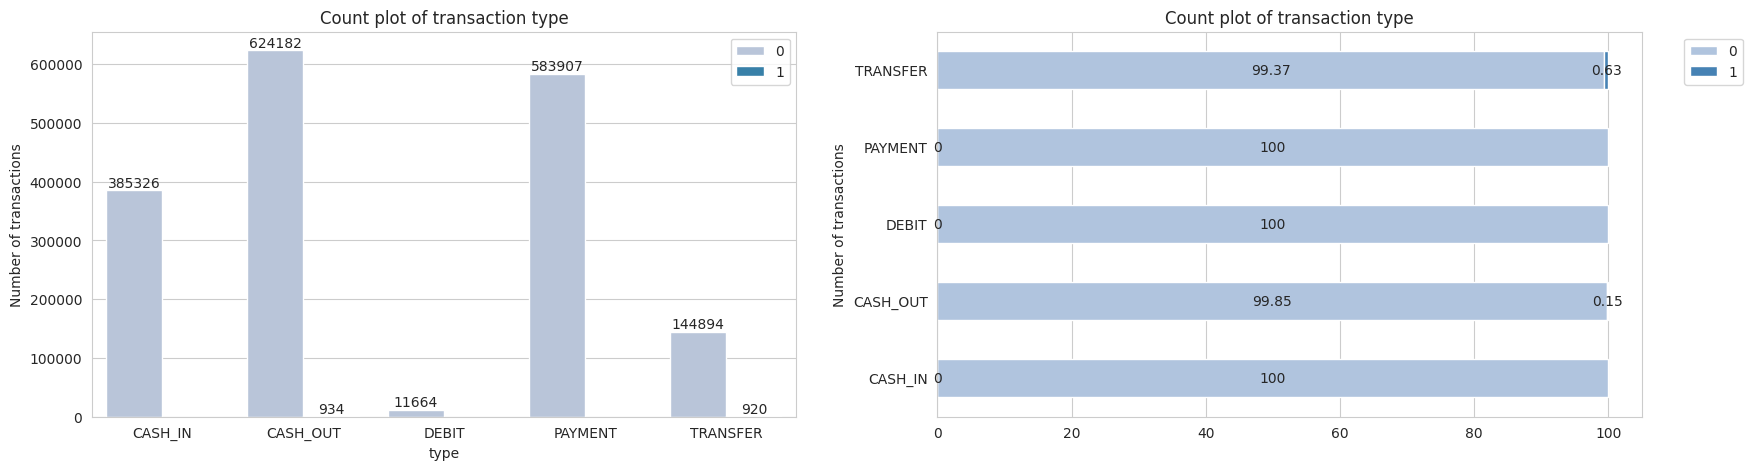

In [22]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(x='type', data=df, hue='isFraud', palette='PuBu', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of transactions')

df2 = df.groupby(['type', 'isFraud']).size().unstack()
df2.apply(lambda x : round(x/sum(x)*100, 2), axis=1).plot(kind='barh', stacked=True, color=['lightsteelblue', 'steelblue'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Count plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0, 0.5, 'Number of transactions')

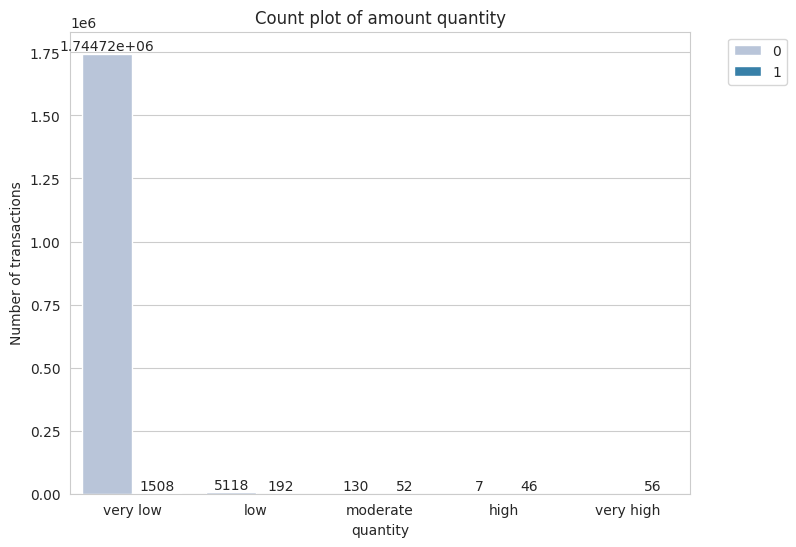

In [23]:
df['quantity'] = pd.cut(df['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

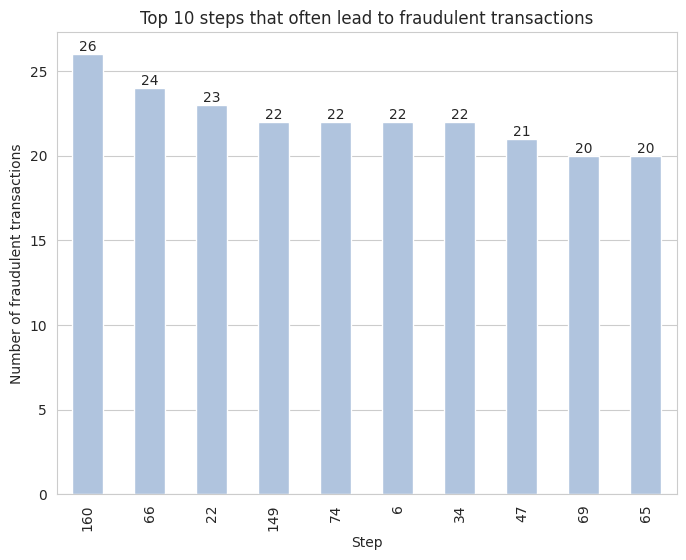

In [24]:
df1 = df[df['isFraud']==1]
df2 = df1['step'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

del ax, df2

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 0, 'Initial customers pre-transaction balance amount')

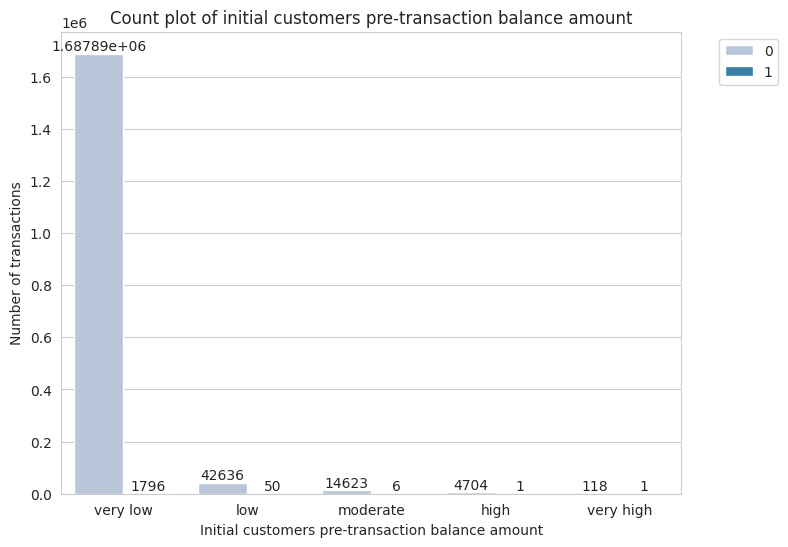

In [25]:
df['oldbalanceOrg_amt'] = pd.cut(df['oldbalanceOrg'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceOrg_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')

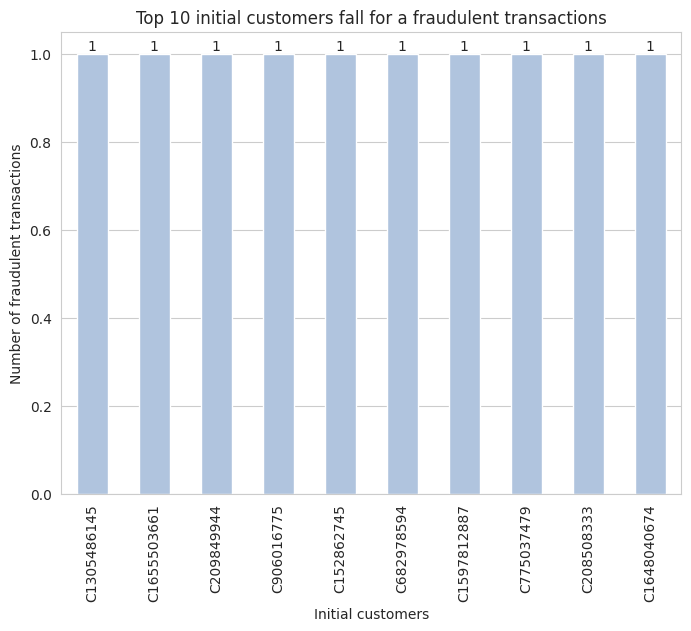

In [26]:
df2 = df1['nameOrig'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')
plt.grid(axis='x')

del ax, df2


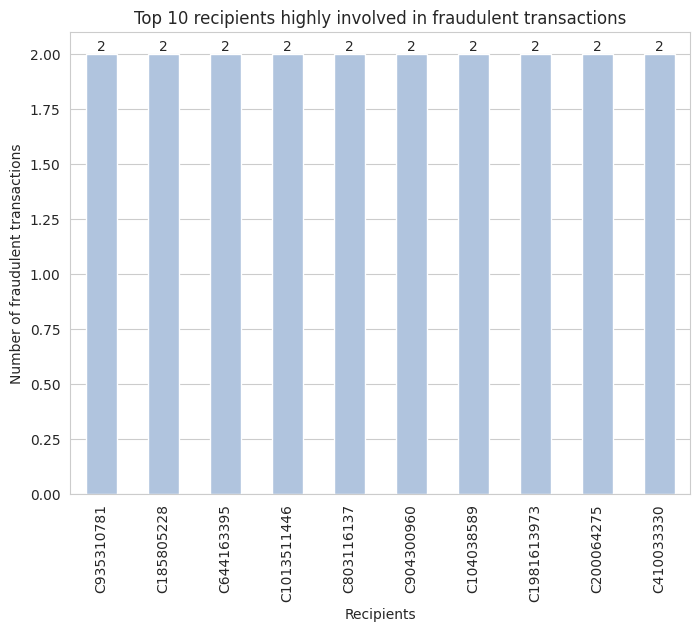

In [27]:
df2 = df1['nameDest'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')
plt.grid(axis='x')

del ax, df2

Multivariate data visualization

Text(0.5, 1.0, 'Correlation')

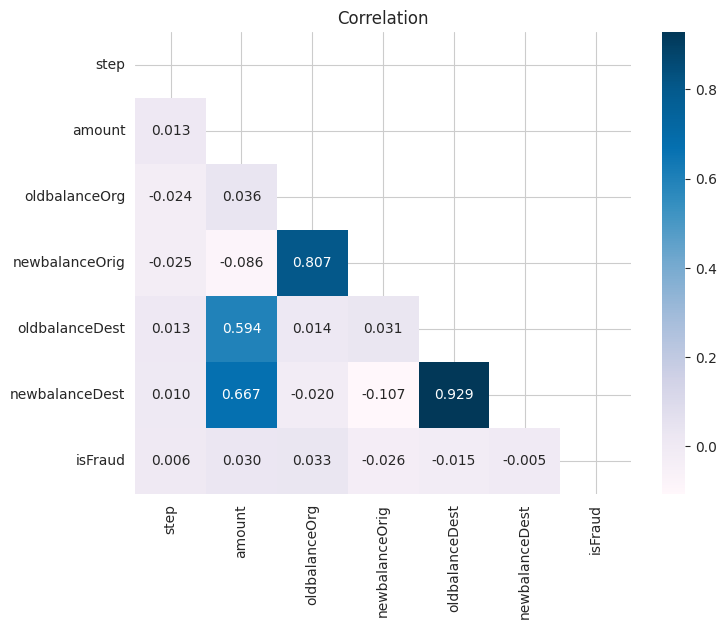

In [29]:
# Calculate the correlation matrix only for numeric columns
corr_matrix = df.select_dtypes(include=np.number).corr('spearman')

sns.heatmap(corr_matrix, cbar=True, annot=True, mask = np.triu(np.ones_like(corr_matrix, dtype = bool)), fmt='.3f', cmap='PuBu')
plt.title('Correlation')

 Model Building

In [31]:
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':4, 'CASH_OUT':2, 'TRANSFER':4})

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import random

seed = 42
np.random.seed(seed)
random.seed(seed)

# Assuming X_train is your DataFrame

# 1. Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(exclude=['object', 'category']).columns
#Remove problematic columns from categorical columns
categorical_cols = categorical_cols.drop(['nameOrig', 'nameDest']) # Assuming 'nameOrig' and 'nameDest' are the problematic columns
# 2. Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# 3. Create a ColumnTransformer to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# 4. Fit and transform the data
X_train_encoded = preprocessor.fit_transform(X_train)

# 5. Now you can fit your model
model = RandomForestClassifier(class_weight='balanced', random_state=seed)
#Fit the model with the encoded data
model.fit(X_train_encoded, y_train)
classifiers = { 'Random Forest Classifier':RandomForestClassifier(class_weight='balanced', random_state=seed),
                'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=seed)
              }

def model_comparison_evaluate(classifiers, X, y):
    print('K-Fold Cross-Validation:\n')

    # Create a StratifiedKFold instance
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

    for name, model in classifiers.items():
        print('{}:'.format(name))

        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

        # Create a copy of X to avoid modifying the original DataFrame
        X_encoded = X.copy()

        # Identify columns with 'object' or 'category' dtype
        object_cols = X_encoded.select_dtypes(include=['object', 'category']).columns

        # Apply Label Encoding to object columns
        for col in object_cols:
            le = LabelEncoder()
            X_encoded[col] = le.fit_transform(X_encoded[col])

        # Fit the model ONCE outside the scoring loop
        model = RandomForestClassifier(class_weight='balanced', random_state=seed)
        model.fit(X_encoded, y) # Use the encoded data

        for score in scoring:
            scores = cross_val_score(model, X_encoded, y, scoring=score, cv=skfold, n_jobs=-1)
            print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))

        print('\n')

model_comparison_evaluate(classifiers, X_train, y_train)

# Apply the same preprocessing to X_test
X_test_encoded = preprocessor.transform(X_test)

model = RandomForestClassifier(class_weight='balanced', random_state=seed)
#Fit the model with the encoded data
model.fit(X_train_encoded, y_train)
# Predict using encoded data
y_pred = model.predict(X_test_encoded)


K-Fold Cross-Validation:

Random Forest Classifier:
Mean accuracy score: 0.978 (0.005)
Mean precision score: 0.977 (0.006)
Mean recall score: 0.980 (0.005)
Mean f1 score: 0.978 (0.005)
Mean roc_auc score: 0.996 (0.001)


Logistic Regression:
Mean accuracy score: 0.978 (0.005)
Mean precision score: 0.977 (0.006)
Mean recall score: 0.980 (0.005)
Mean f1 score: 0.978 (0.005)
Mean roc_auc score: 0.996 (0.001)




Random Forest Classifier:
               precision    recall  f1-score   support

Non-Fraud [0]       0.99      1.00      1.00    347868
    Fraud [1]       0.92      0.13      0.23      2498

     accuracy                           0.99    350366
    macro avg       0.96      0.57      0.61    350366
 weighted avg       0.99      0.99      0.99    350366
 



Text(0.5, 0, 'False Positive Rate')

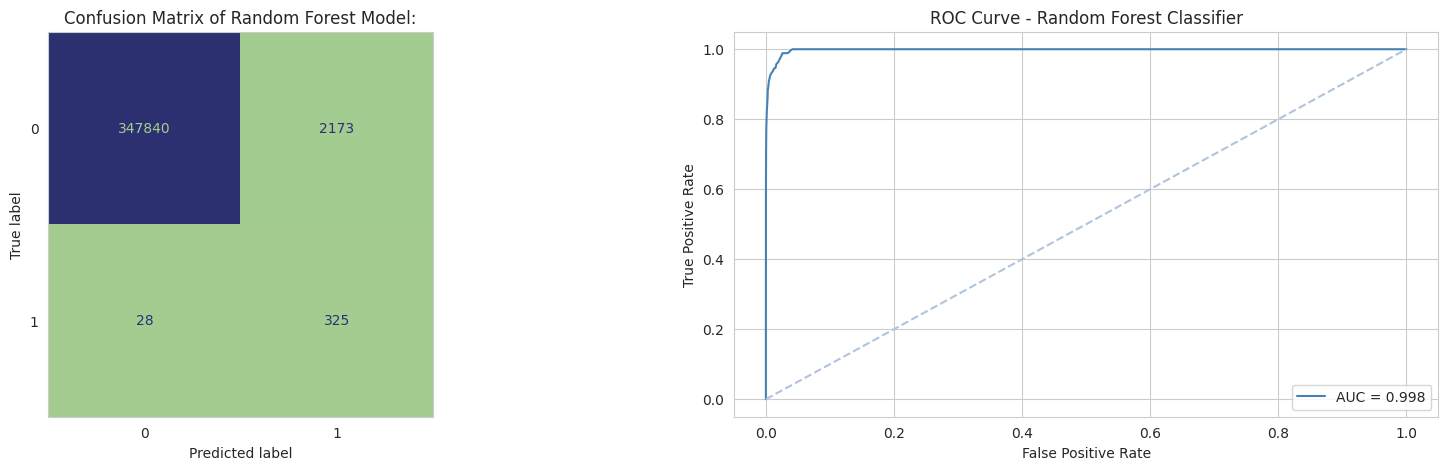

In [74]:
# Apply Label Encoding to object columns in X_train before fitting the model
for col in X_train.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])

model = RandomForestClassifier(class_weight='balanced', random_state=seed)
model.fit(X_train, y_train)

# Remember to apply the same encoding to X_test before prediction
for col in X_test.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X_test[col] = le.fit_transform(X_test[col]) # Apply the label encoding to X_test before prediction

y_pred = model.predict(X_test)

y_pred_score = model.predict_proba(X_test)[:,1]
print('Random Forest Classifier:')
print(classification_report(y_pred, y_test, labels=[0,1], target_names=['Non-Fraud [0]', 'Fraud [1]']), '\n')



fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_title('Confusion Matrix of Random Forest Model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)



fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
roc_auc = auc(fpr, tpr)
ax[1].set_title('ROC Curve - Random Forest Classifier')
ax[1].plot(fpr, tpr, label = 'AUC = %0.3f' % roc_auc, c='steelblue')
ax[1].plot([0,1],[0,1],'--', c='lightsteelblue')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')